#### Ye, Frank
#### 260689448

### Evolutionary Dynamics Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [2]:
def xyz_plot(coords):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    x, y, z = [], [], []

    for i in range(len(coords)):
        x.append(coords[i][0])
        y.append(coords[i][1])
        z.append(coords[i][2])
        
    ax.scatter(x, y, z, c='r')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('x3')
    plt.show()

In [27]:
# Utility matrix for 2 player symmetric game
A = np.array([[0, 5, 4],
             [4, 0, 5],
             [5, 4, 0]])
# Initial point
x_start = np.array([0.25, 0.5, 0.25])

# List of parameter eta for logit dynamics
eta = np.array([0.01, 0.1, 1])

#### a) Replicator Dynamics

In [4]:
def replicator_dynamics(x_initial, num_iter, matrix, learning_rate=1e-3):
    """ Function that returns list of coordinates given replicator dynamics and initial point

    Args:
        x_initial: Starting point
        num_iter: Number of iterations
        matrix: symmetric game matrix
    Returns:
        List of x coordinates of length num_iter

    """
    x_curr = x_initial.copy()
    positions = []
    
    for i in range(num_iter):
        positions.append(x_curr.copy())
        f = np.matmul(matrix, x_curr)
        avg_payoff = np.matmul(np.transpose(x_curr), f)  # Average payoff
        f_bar = np.multiply(avg_payoff, np.ones(3))  # Average payoff vector
        x_dot = np.multiply(x_curr, (f - f_bar))  # Displacement vector
        x_curr += learning_rate * x_dot  # Update position
        
    return positions  

In [5]:
max_iter = 5000
coords_a = replicator_dynamics(x_start, max_iter, A)

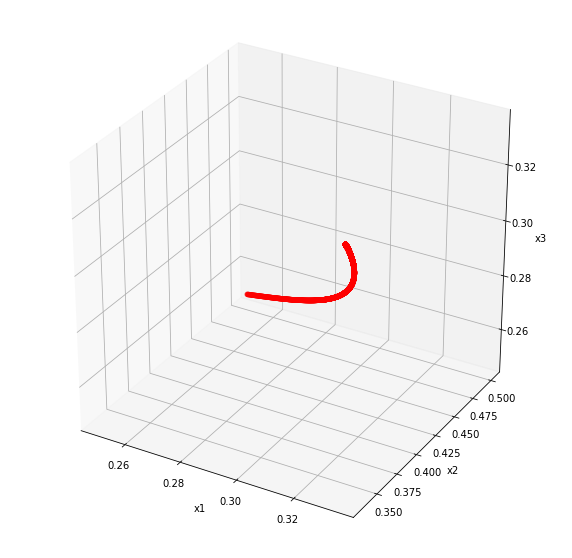

In [6]:
xyz_plot(coords_a)

#### b) BNN Dynamics

In [7]:
def bnn_dynamics(x_initial, num_iter, matrix, learning_rate=1e-3):
    """ Function that returns list of coordinates given BNN dynamics and initial point

    Args:
        x_initial: Starting point
        num_iter: Number of iterations
        matrix: symmetric game matrix
    Returns:
        List of x coordinates of length num_iter

    """
    x_curr = x_initial.copy()
    positions = []
    
    for i in range(num_iter):
        positions.append(x_curr.copy())
        f = np.matmul(matrix, x_curr)
        avg_payoff = np.matmul(np.transpose(x_curr), f)  # Average payoff
        f_bar = np.multiply(avg_payoff, np.ones(3))  # Average payoff vector
        pi_hat_plus = np.maximum((f-f_bar),np.zeros(3)) # sign function pi_hat
        x_dot = pi_hat_plus - np.multiply(x_curr, pi_hat_plus.sum())  # Displacement vector
        x_curr += learning_rate * x_dot  # Update position
        
    return positions  

In [8]:
max_iter = 500
coords_b = bnn_dynamics(x_start, max_iter, A, 1e-2)

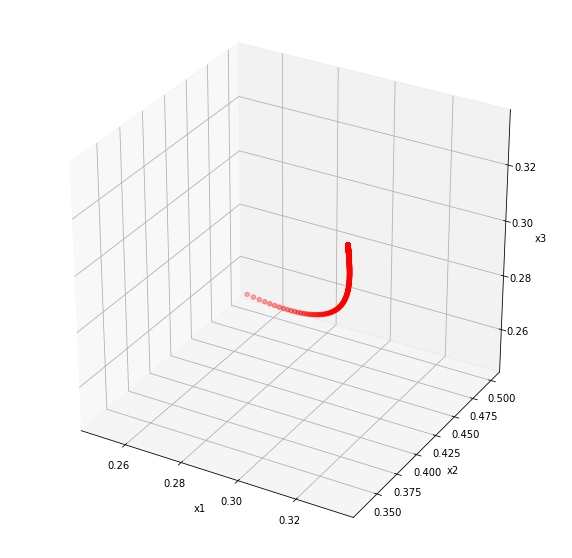

In [9]:
xyz_plot(coords_b)

#### c) Smith Dynamics

In [10]:
def smith_dynamics(x_initial, num_iter, matrix, learning_rate=1e-3):
    """ Function that returns list of coordinates given Smith dynamics and initial point

    Args:
        x_initial: Starting point
        num_iter: Number of iterations
        matrix: symmetric game matrix
    Returns:
        List of x coordinates of length num_iter

    """
    x_curr = x_initial.copy()
    positions = []
    
    for i in range(num_iter):
        
        positions.append(x_curr.copy())
        f_i = np.matmul(matrix, x_curr)
        j = np.random.rand(3)
        j /= np.sum(j)
        f_j = np.matmul(matrix, j)
        pi_i = np.matmul(np.transpose(x_curr), f_i)  # current payoff
        pi_j = np.matmul(np.transpose(j), f_j)   # random payoff
        if ((pi_i - pi_j) > 0).all():
            x_dot = f_i - f_j  # Displacement vector
        else:
            x_dot = np.zeros(3)
        x_curr += learning_rate * x_dot  # Update position
        
    return positions  

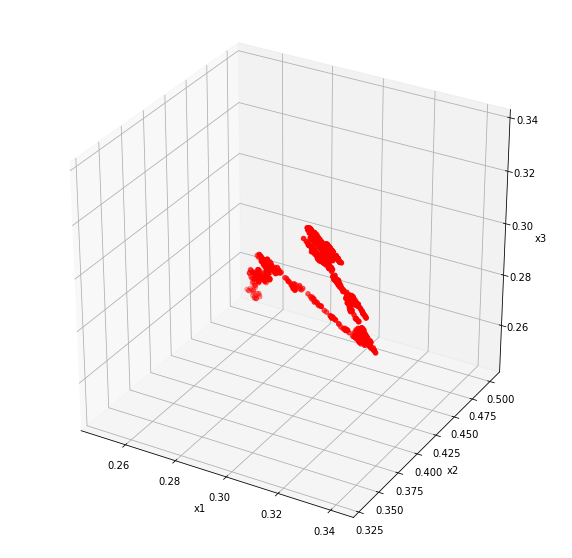

[array([0.32778733, 0.3386237 , 0.33358897]),
 array([0.32820779, 0.33889429, 0.33289792]),
 array([0.32746279, 0.33853425, 0.33400296]),
 array([0.32717351, 0.33817815, 0.33464834]),
 array([0.32590024, 0.33972268, 0.33437707]),
 array([0.32649519, 0.33890907, 0.33459574]),
 array([0.32585085, 0.34048248, 0.33366667]),
 array([0.32527737, 0.34035723, 0.3343654 ]),
 array([0.32453439, 0.34122069, 0.33424492]),
 array([0.32457848, 0.34035009, 0.33507143])]

In [16]:
max_iter = 1000
coords_c = smith_dynamics(x_start, max_iter, A, 1e-3)
xyz_plot(coords_c)
coords_c[990:]

#### d) Logit Dynamics

In [23]:
def sigmoid(vector, eta):
    """Function that applies the sigmoid function given eta parameter

    Args:
        vector: vector to pass through logit function
        eta: temperature
    Returns:
        List of x coordinates
    
    """
    
    return np.exp(1./eta*vector)/np.exp(1./eta*vector).sum()

def logit_dynamics(x_initial, num_iter, matrix, eta=1e-2,learning_rate=1e-2):
    """ Function that returns list of coordinates given logit dynamics and initial point

    Args:
        x_initial: Starting point
        num_iter: Number of iterations
        matrix: symmetric game matrix
        eta: temperature
    Returns:
        List of x coordinates of length num_iter

    """
    x_curr = x_initial.copy()
    positions = []
    
    for i in range(num_iter):
        positions.append(x_curr.copy())
        f = np.matmul(matrix, x_curr)
        x_dot = sigmoid(f, eta) - x_curr  # Displacement vector
        x_curr += learning_rate * x_dot  # Update position
        
    return positions

In [24]:
max_iter = 75
coords_d1 = logit_dynamics(x_start, max_iter, A, eta[0])  # eta = 0.01
coords_d1[70:]

[array([0.33333333, 0.33333333, 0.33333333]),
 array([0.33333333, 0.33333333, 0.33333333]),
 array([0.33333333, 0.33333333, 0.33333333]),
 array([0.33333333, 0.33333333, 0.33333333]),
 array([0.33333333, 0.33333333, 0.33333333])]

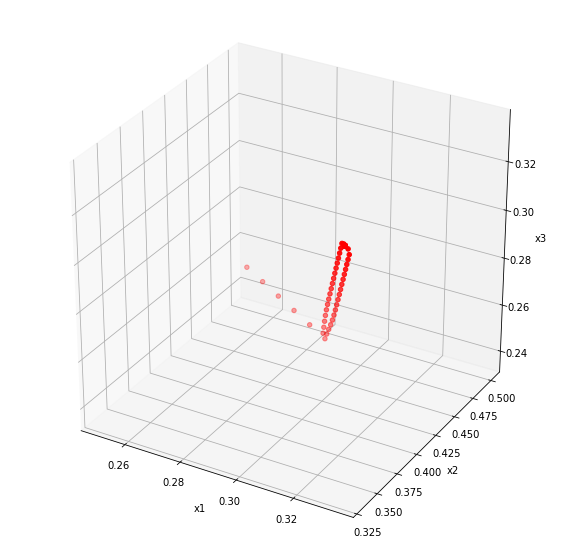

In [25]:
xyz_plot(coords_d1)

In [30]:
max_iter = 75
coords_d2 = logit_dynamics(x_start, max_iter, A, eta[1])  # eta = 0.1
coords_d2[60:]

[array([0.33348701, 0.33357515, 0.33293784]),
 array([0.33347279, 0.33352734, 0.33299987]),
 array([0.3334591 , 0.33348842, 0.33305248]),
 array([0.33344612, 0.33345683, 0.33309705]),
 array([0.33343399, 0.33343124, 0.33313476]),
 array([0.33342277, 0.33341058, 0.33316665]),
 array([0.33341249, 0.33339394, 0.33319356]),
 array([0.33340314, 0.33338058, 0.33321627]),
 array([0.3333947, 0.3333699, 0.3332354]),
 array([0.33338711, 0.33336139, 0.3332515 ]),
 array([0.33338033, 0.33335463, 0.33326503]),
 array([0.3333743, 0.3333493, 0.3332764]),
 array([0.33336896, 0.33334511, 0.33328593]),
 array([0.33336424, 0.33334184, 0.33329392]),
 array([0.3333601, 0.3333393, 0.3333006])]

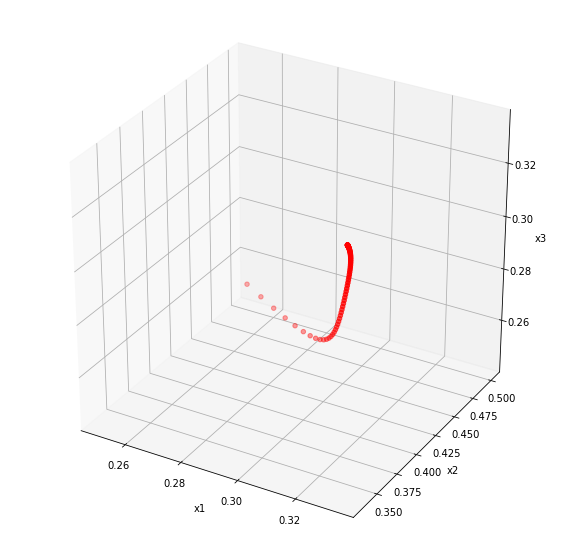

In [31]:
xyz_plot(coords_d2)

In [37]:
max_iter = 300
coords_d3 = logit_dynamics(x_start, max_iter, A, eta[2])  # eta = 1
coords_d3[280:]

[array([0.33338077, 0.3334418 , 0.33317743]),
 array([0.33338003, 0.33343875, 0.33318123]),
 array([0.33337929, 0.33343578, 0.33318493]),
 array([0.33337856, 0.3334329 , 0.33318855]),
 array([0.33337783, 0.33343009, 0.33319208]),
 array([0.33337712, 0.33342736, 0.33319552]),
 array([0.33337641, 0.33342471, 0.33319888]),
 array([0.33337571, 0.33342213, 0.33320216]),
 array([0.33337502, 0.33341962, 0.33320537]),
 array([0.33337433, 0.33341718, 0.33320849]),
 array([0.33337365, 0.33341481, 0.33321154]),
 array([0.33337298, 0.3334125 , 0.33321452]),
 array([0.33337232, 0.33341026, 0.33321742]),
 array([0.33337167, 0.33340808, 0.33322026]),
 array([0.33337102, 0.33340595, 0.33322302]),
 array([0.33337038, 0.33340389, 0.33322572]),
 array([0.33336976, 0.33340189, 0.33322836]),
 array([0.33336913, 0.33339994, 0.33323093]),
 array([0.33336852, 0.33339804, 0.33323344]),
 array([0.33336791, 0.3333962 , 0.33323589])]

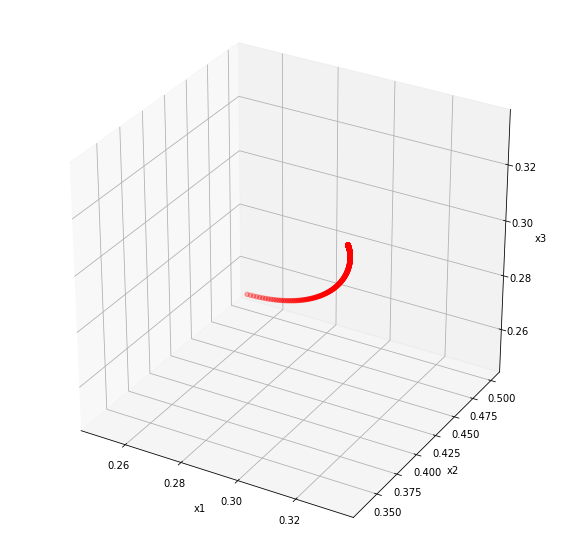

In [36]:
xyz_plot(coords_d3)